# Les régularisations

On va regarder un peu ce qu'il se passe au niveau des régularisations de la régression linéaire (régressions Ridge et Lasso) ainsi que des paramètres de pénalisation pour la régression logistique.

In [1]:
### Import des libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Les données

Les données sont issues d'une étude qui s'intéresse à la corrélation entre le niveau d'un antigène spécifique de la prostate et un certain nombre de mesures cliniques chez des patients hommes sur le point de subir une prostatectomie radicale.

*lcavol* : log(cancer volume)  
*lweight* : log(prostate weight)  
*age* : age  
*lbph* : log(benign prostatic hyperplasia amount)  
*svi* : seminal vesicle invasion  
*lcp* : log(capsular penetration)  
*gleason* : Gleason score  
*pgg45* : percentage Gleason scores 4 or 5  
*lpsa* : log(prostate specific antigen)

In [2]:
### Import des données
data = pd.read_csv('prostate.txt', delimiter='\t')
data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


## Préparation des données

In [3]:
### Restriction aux données qui nous intéressent : matrice X, vecteur y
X = data.iloc[:,1:-3]
y = data.iloc[:,-2]

In [4]:
### Train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 12345)

In [5]:
### Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## La régression linéaire

In [6]:
### Modèle de régression linéaire
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(X_train,y_train)

LinearRegression()

In [7]:
# Calcul du MSE : erreur qui nous servira de base d'amélioration possible
from sklearn.metrics import mean_squared_error
error0 = mean_squared_error(reglin.predict(X_test),y_test)
error0

0.527394004144862

## La régression Ridge

In [8]:
# Coefficients de régularisation à tester
alphas = np.logspace(-5, 5, 200)

In [9]:
# Modèle de régression Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

# On entraîne un modèle pour chaque valeur de alpha et on va regarder l'erreur correspondante
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    #errors.append([error0, mean_squared_error(reglin.predict(X_test),y_test)])
    errors.append(mean_squared_error(ridge.predict(X_test),y_test))

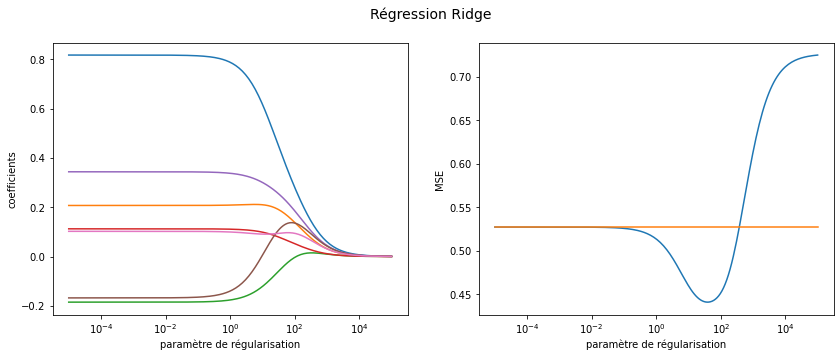

In [10]:
# Affichage de 2 courbes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

# Le chemin de régularisation : évolution des coefficients en fonction du paramètre de régularisation
ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('paramètre de régularisation')
ax1.set_ylabel('coefficients')

# L'évolution de l'erreur de prédiction sur le test set en fonction du paramètre de régularisation
ax2.plot(alphas, errors, [10**-5,10**5],[error0,error0])
ax2.set_xscale('log')
ax2.set_xlabel('paramètre de régularisation')
ax2.set_ylabel('MSE')

fig.suptitle('Régression Ridge',fontsize=14)
plt.show()

In [11]:
# Erreur minimale de la régression Ridge
min(errors)

0.44115467163136224

In [12]:
# Alpha qui minimise l'erreur
alphas[np.argmin(errors)]

38.27494478516315

## La régression Lasso

In [13]:
alphas = np.logspace(-5, 5, 200)

from sklearn.linear_model import Lasso
lasso = Lasso()

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(mean_squared_error(lasso.predict(X_test),y_test))

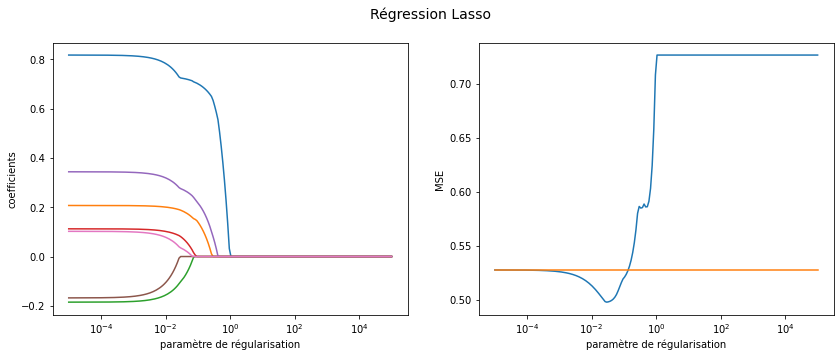

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('paramètre de régularisation')
ax1.set_ylabel('coefficients')

ax2.plot(alphas, errors, [10**-5,10**5],[error0,error0])
ax2.set_xscale('log')
ax2.set_xlabel('paramètre de régularisation')
ax2.set_ylabel('MSE')

fig.suptitle('Régression Lasso',fontsize=14)
plt.show()

In [15]:
min(errors)

0.4975664389214067

In [16]:
alphas[np.argmin(errors)]

0.029331662783900453

## La régression logistique régularisée

In [17]:
### Modification du vecteur y
X = data.iloc[:,1:-3]
y = data.iloc[:,-1]

In [18]:
### Train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 12345)

### Faites jouer simultanément les différents paramètres possibles : avec ou sans *features scaling*, la penalité (penalty={'none','l2','l1'} et le solver quand nécessaire)

In [19]:
### Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
### Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver = 'saga', penalty='l2')
reglog.fit(X_train,y_train)

# Calcul de l'accuracy
from sklearn.metrics import accuracy_score
accuracy_score(reglog.predict(X_test),y_test)

0.6